In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Building the Model

## Loading Dataframes

In [46]:
train_set = pd.read_pickle("./normalized_train_data.pkl")

In [47]:
train_set

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,...,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
0,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.50,1.000000,...,0.736842,0.513959,0.736842,0.483105,0.473182,0.736842,0.874319,0.874319,0.808943,0.868697
1,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.50,1.000000,...,0.736842,0.513959,0.736842,0.483105,0.473182,0.736842,0.874319,0.874319,0.933333,0.868697
2,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.50,1.000000,...,0.736842,0.513959,0.736842,0.483105,0.473182,0.736842,0.874319,0.874319,1.000000,0.868697
3,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.50,1.000000,...,0.736842,0.513959,0.736842,0.483105,0.473182,0.736842,0.874319,0.874319,0.808943,0.868697
4,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.50,1.000000,...,0.736842,0.513959,0.736842,0.483105,0.473182,0.736842,0.874319,0.874319,0.808943,0.868697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.307692,0.586207,0.705128,0.000000,0.093015,0.110425,0.153871,0.803867,0.25,0.000000,...,0.000000,0.440860,0.000000,0.483105,0.517978,0.000000,0.000000,0.148936,0.133995,0.000000
5995,0.551282,0.344828,0.461538,0.090909,0.155297,0.195051,0.058982,0.359116,0.00,0.636364,...,0.000000,0.296296,0.000000,0.505129,0.517978,0.000000,0.000000,0.070796,0.279070,0.000000
5996,0.551282,0.344828,0.461538,0.090909,0.155297,0.195051,0.058982,0.359116,0.00,0.636364,...,0.000000,0.296296,0.000000,0.505129,0.517978,0.000000,0.000000,0.070796,0.000000,0.000000
5997,0.551282,0.344828,0.461538,0.090909,0.155297,0.195051,0.058982,0.359116,0.00,0.636364,...,0.000000,0.296296,0.000000,0.505129,0.517978,0.000000,0.000000,0.141667,0.957447,0.000000


In [48]:
validation_set = pd.read_pickle("./normalized_validation_data.pkl")

In [49]:
validation_set

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,...,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
0,0.421687,0.551724,0.571429,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.428571,0.437393,0.428571,0.521078,0.467380,0.153846,0.000000,0.061977,0.165123,0.000000
1,0.421687,0.551724,0.571429,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.428571,0.437393,0.428571,0.521078,0.467380,0.153846,0.000000,0.061977,0.321185,0.000000
2,0.421687,0.551724,0.571429,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.428571,0.437393,0.428571,0.521078,0.467380,0.214286,0.752969,0.752969,0.000000,0.878095
3,0.421687,0.551724,0.571429,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,0.090909,...,0.428571,0.437393,0.428571,0.521078,0.467380,0.200000,1.000000,0.061977,0.415550,1.000000
4,0.421687,0.551724,0.571429,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,0.636364,...,0.428571,0.437393,0.428571,0.521078,0.538345,0.500000,1.000000,0.061977,0.520089,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.349398,0.586207,0.654762,0.000000,0.093015,0.110425,0.153871,0.803867,0.250,0.000000,...,0.727273,0.510638,0.727273,0.519591,0.538345,0.428571,0.000000,0.065421,0.166271,0.000000
9992,0.349398,0.586207,0.654762,0.000000,0.093015,0.110425,0.153871,0.803867,0.250,0.000000,...,0.727273,0.510638,0.727273,0.521078,0.538345,0.285714,0.752969,0.752969,0.848430,0.878095
9993,0.349398,0.586207,0.654762,0.000000,0.093015,0.110425,0.153871,0.803867,0.250,0.000000,...,0.727273,0.510638,0.727273,0.521078,0.538345,0.285714,0.752969,0.752969,0.848430,0.878095
9994,0.578313,0.344828,0.428571,0.090909,0.155297,0.195051,0.058982,0.359116,0.000,0.636364,...,0.375000,0.449468,0.375000,0.479888,0.538345,0.266667,0.000000,0.081886,0.292308,0.000000


## Shuffling dataset

In [50]:
train_set = train_set.sample(frac=1)

## Removing Year from data (due to bias)

In [51]:
train_set = train_set.drop('year', axis=1)
validation_set = validation_set.drop('year', axis=1)

## Separating into Data and Labels

### Training

In [52]:
train_data = train_set.drop(columns="is_fraud").values.astype('float32')
train_labels = train_set['is_fraud'].values.astype('float32')

In [53]:
print(train_data)

[[0.33333334 0.6551724  0.6666667  ... 0.12359551 0.3857143  0.        ]
 [0.6923077  0.51724136 0.30769232 ... 0.20930232 0.         0.        ]
 [0.08974359 0.55172414 0.9102564  ... 0.8743188  0.3857143  0.8686971 ]
 ...
 [0.34615386 0.6551724  0.6666667  ... 0.125      0.3857143  1.        ]
 [0.32051283 0.5862069  0.67948717 ... 0.1754386  0.1552795  0.        ]
 [0.35897437 0.7586207  0.64102566 ... 0.13636364 0.13399504 0.        ]]


In [54]:
print(train_labels)

[0. 0. 1. ... 1. 0. 0.]


### Validation

In [55]:
validation_data = validation_set.drop(columns="is_fraud").values.astype('float32')
validation_labels = validation_set['is_fraud'].values.astype('float32')

In [56]:
print(validation_data)

[[0.42168674 0.55172414 0.5714286  ... 0.06197655 0.16512346 0.        ]
 [0.42168674 0.55172414 0.5714286  ... 0.06197655 0.32118452 0.        ]
 [0.42168674 0.55172414 0.5714286  ... 0.75296915 0.         0.8780945 ]
 ...
 [0.3493976  0.5862069  0.6547619  ... 0.75296915 0.8484305  0.8780945 ]
 [0.57831323 0.3448276  0.42857143 ... 0.08188586 0.2923077  0.        ]
 [0.03614458 0.3448276  0.95238096 ... 0.         0.02061856 0.        ]]


In [57]:
print(validation_labels)

[0. 0. 0. ... 1. 0. 0.]


## Defining and Compiling the Model

In [16]:
def displayColumnNames(df):
    temp = 0
    for c in df.columns:
        print(f"{temp} {c}")
        temp += 1

In [31]:
train_data.shape

(5999, 45)

In [32]:
train_labels.shape

(5999,)

In [34]:
model = Sequential()
model.add(Dense(128,  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
BATCH_SIZE = 5

history = model.fit(train_data, train_labels, validation_data=(validation_data,validation_labels), epochs=20, batch_size=BATCH_SIZE, callbacks=callback)

Epoch 1/20
1200/1200 [==============================] - 20s 15ms/step - loss: 0.0713 - accuracy: 0.9767 - val_loss: 0.1064 - val_accuracy: 0.9633
Epoch 2/20
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0460 - accuracy: 0.9863 - val_loss: 0.1033 - val_accuracy: 0.9632
Epoch 3/20
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0398 - accuracy: 0.9885 - val_loss: 0.0914 - val_accuracy: 0.9719
Epoch 4/20
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0374 - accuracy: 0.9893 - val_loss: 0.0883 - val_accuracy: 0.9723
Epoch 5/20
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.2063 - val_accuracy: 0.9473
Epoch 6/20
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0329 - accuracy: 0.9903 - val_loss: 0.1085 - val_accuracy: 0.9638
Epoch 7/20
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 0.1024 -

## Evaluating Model

In [36]:
accuracy = model.evaluate(validation_data, validation_labels)

print('Loss: %.2f' % (accuracy[0]*100))
print('Accuracy: %.2f' % (accuracy[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.1214 - accuracy: 0.9711
Loss: 12.14
Accuracy: 97.11


### Testing Model

In [37]:
predictions = model.predict(validation_data)

313/313 [==============================] - 1s 3ms/step


In [38]:
print(predictions)

[[5.00035126e-12]
 [9.12866724e-08]
 [1.06761836e-01]
 ...
 [9.47765410e-01]
 [4.00090266e-06]
 [2.78530331e-15]]


In [39]:
table = [[0,0],[0,0]]

for i in range(predictions.size):
    if predictions[i] < 0.5:
        if validation_labels[i] == 0:
            table[0][0] += 1
        else:
            table[0][1] += 1
    else:
        if validation_labels[i] == 0:
            table[1][0] += 1
        else:
            table[1][1] += 1
    
print(table)

[[4807, 98], [191, 4900]]


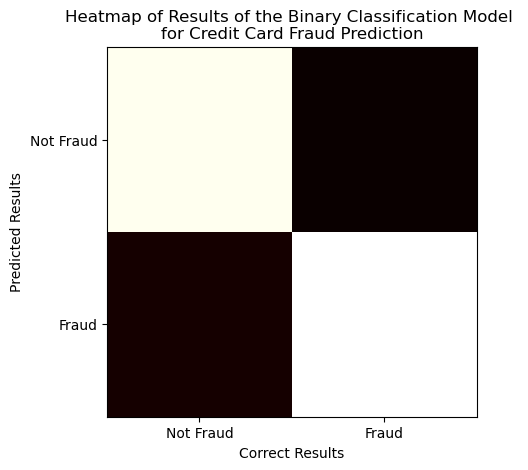

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(table, cmap='hot', interpolation='nearest')
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.yticks([0,1], ["Not Fraud", "Fraud"])
plt.title("Heatmap of Results of the Binary Classification Model \nfor Credit Card Fraud Prediction")
plt.xlabel("Correct Results")
plt.ylabel("Predicted Results")
plt.show()

In [64]:
barTable = {
    "True Negative":table[0][0],
    "False Negative":table[0][1],
    "False Positive":table[1][0],
    "True Positive":table[1][1]
}

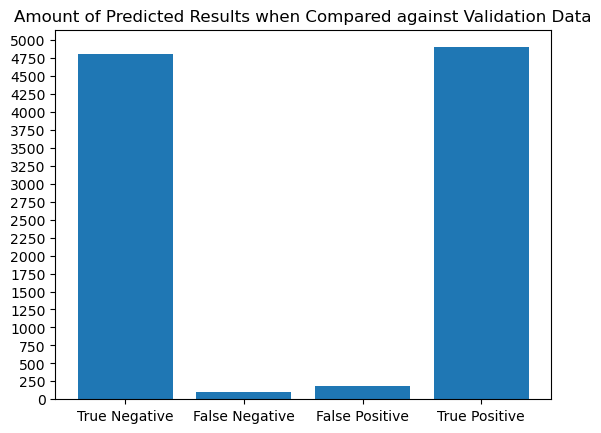

In [75]:
Y_STEP = 250

plt.bar(range(len(barTable)), list(barTable.values()), align='center')
plt.xticks(range(len(barTable)), list(barTable.keys()))
plt.yticks(np.arange(0, max(barTable.values()) + Y_STEP, Y_STEP))
plt.title("Amount of Predicted Results when Compared against Validation Data")
plt.show()

## Saving Model

In [41]:
model.save("CreditCardFraudDetection.keras")